In [31]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [32]:
df = pd.read_csv('contamined_sites.csv')
df.replace(to_replace='\r', value=' ', regex=True, inplace=True)
df.head()

,District,Facility ID,BEA Number,Facility Name,Address,County,Township,City,Zip,Latitude,Longitude,Data Source
0,Upper Peninsula,NaN,200400274UP,#5 Yard,1604 North 26th,Delta,Escanaba,NaN,49829,NaN,NaN,BEA
1,Upper Peninsula,NaN,200000162UP,1.79 Acre Parcel,Ripley,Houghton,Franklin Township,NaN,NaN,NaN,NaN,BEA
2,Upper Peninsula,36000026.0,NaN,"114 E Cemetery Rd, AST release",114 E Cemetery Rd,Iron,Amasa,Amasa,NaN,46.2392,-88.4509,Part 201
3,Upper Peninsula,27000069.0,NaN,124 Gogebic St Ironwood Heating Oil,124 Gogebic Street,Gogebic,Ironwood City,Ironwood,49938,NaN,NaN,Part 201
4,Upper Peninsula,NaN,201600626UP,127 West Munising Avenue,127 West Munising Avenue,Alger,Munising,NaN,49862,NaN,NaN,BEA


In [36]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states = states.to_crs(epsg=5070)

In [37]:
points = df.apply(lambda x: Point(x.Longitude, x.Latitude), axis=1)
df = gpd.GeoDataFrame(df, geometry=points)
df.crs = {'init': 'epsg:4326'}
df = df.to_crs(epsg=5070)

(395607.61553862429,
 1131812.7963021835,
 2085272.9978398085,
 2862958.9980860902)

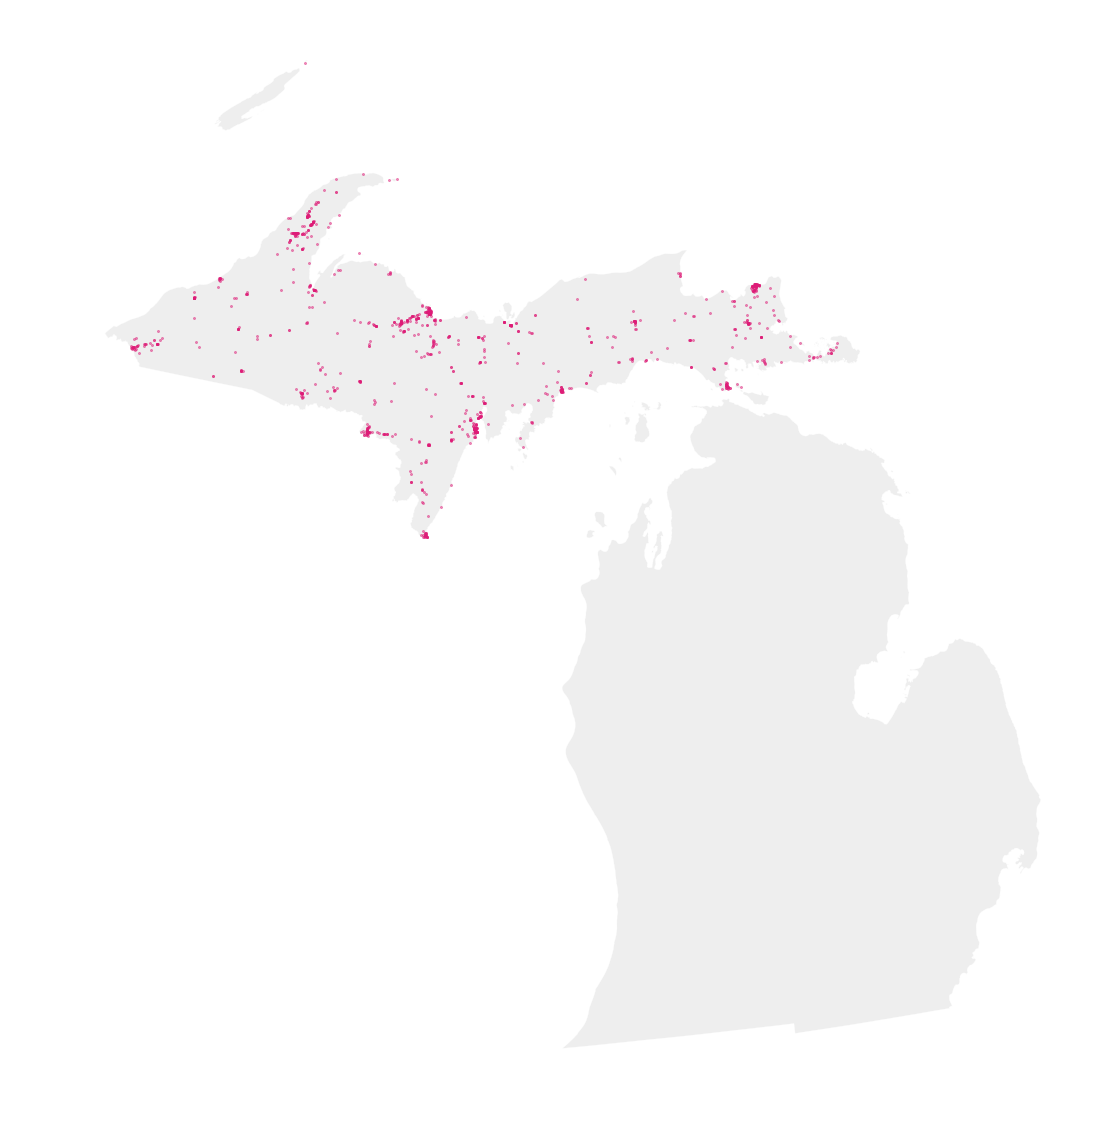

In [38]:
ax = states[states['NAME'] == 'Michigan'].plot(
    color='#dedede',
    edgecolor='white',
    linewidth=0.25,
    figsize=(20,20)
)
df.plot(ax=ax, color='#dd1c77', alpha=0.45, )
ax.axis('off')